# Experiment 9: Decision Tree with Cross Validation and Grid Search CV

### Name: Ashish Nanda
### Roll No.: J041

In [1]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

/Users/ashishnanda/Desktop/Experiment9


In [2]:
data = pd.read_csv('car_evaluation.csv', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
for i in col_names:
    print(data[i].value_counts())

med      432
low      432
high     432
vhigh    432
Name: buying, dtype: int64
med      432
low      432
high     432
vhigh    432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
big      576
med      576
small    576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [8]:
data.shape

(1728, 7)

In [9]:
X = data.drop(['class'], axis=1)
y = data['class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

## Gini index as criterion

In [12]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [13]:
y_pred = clf_gini.predict(X_test)

# Grid Search CV

In [14]:
option = ['gini', 'entropy']
weight_option=['auto', 'sqrt', 'log2']
param_grid = {'criterion': option , 'max_features':[2, 3, 4, 5, 6] , 'max_depth':[4, 5, 6, 7], 'min_samples_split':[2, 3, 4, 5]}
grid = GridSearchCV(clf_gini, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [15]:
print(grid.best_score_)
print(grid.best_params_)

0.9247311827956989
{'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'min_samples_split': 2}


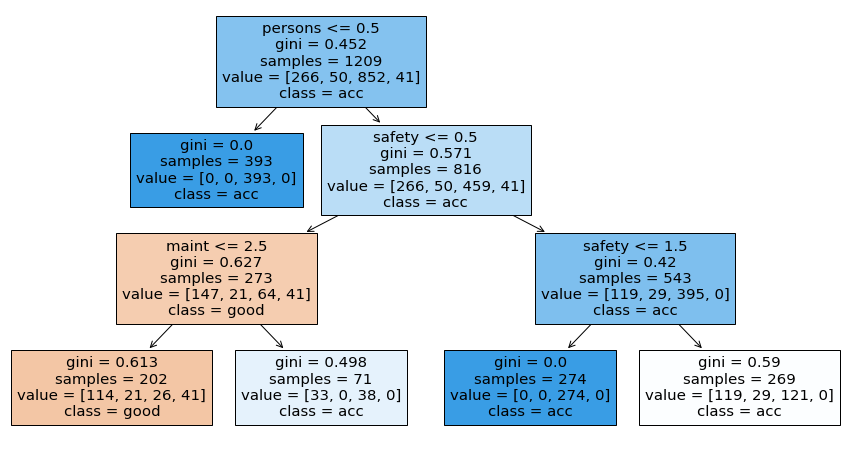

In [16]:
plt.figure(figsize=(15, 8))
tree.plot_tree(clf_gini,
               feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
               class_names= list(set(y_train)),
               filled = True)
plt.show()

In [17]:
# Check for underfitting
print(f'Training set score: {clf_gini.score(X_train, y_train)}')
print(f'Test set score: {clf_gini.score(X_test, y_test)}')

Training set score: 0.7775020678246485
Test set score: 0.7572254335260116


# Model after Grid Search

In [18]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features=6)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=6)

In [19]:
y_pred = dtc.predict(X_test)

In [20]:
print(f'Training set score: {dtc.score(X_train, y_train)}')
print(f'Test set score: {dtc.score(X_test, y_test)}')

Training set score: 0.9330024813895782
Test set score: 0.9344894026974951


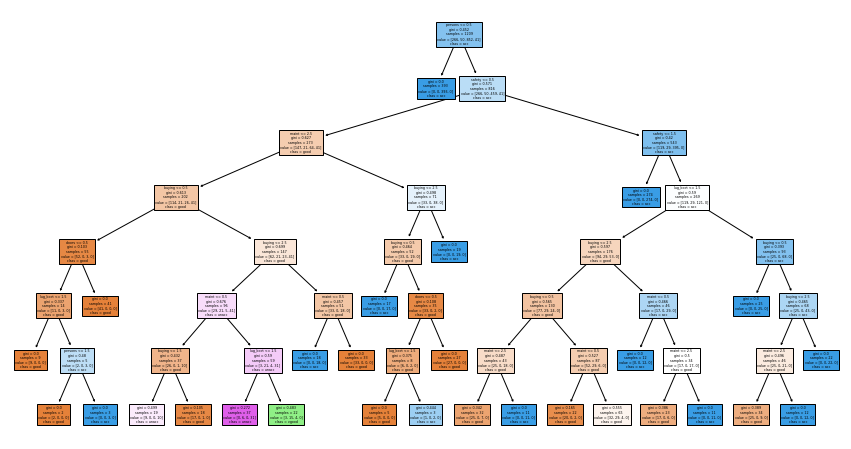

In [21]:
plt.figure(figsize=(15, 8))
tree.plot_tree(dtc,
               feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
               class_names= list(set(y_train)),
               filled = True)
plt.show()

## Cross Validation

In [22]:
score = cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy')
score.mean()

0.920564738292011

In [23]:
score = cross_val_score(dtc, X_test, y_test, cv=10, scoring='accuracy')
score.mean()

0.8959653092006032

In [24]:
cm = confusion_matrix(y_test, y_pred)

In [25]:
print(cm)

[[109   4   1   4]
 [ 10   6   0   3]
 [ 11   0 346   1]
 [  0   0   0  24]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.84      0.92      0.88       118
        good       0.60      0.32      0.41        19
       unacc       1.00      0.97      0.98       358
       vgood       0.75      1.00      0.86        24

    accuracy                           0.93       519
   macro avg       0.80      0.80      0.78       519
weighted avg       0.94      0.93      0.93       519

